# import

In [2]:
%cd /content/drive/My Drive/Packages

import pandas as pd
import numpy as np
import scipy.sparse as sps
import time

%cd /content/drive/My Drive/GitHub/minor-goodbooks-recommender

/content/drive/My Drive/Packages
/content/drive/My Drive/GitHub/minor-goodbooks-recommender


In [1]:
import pandas as pd
import numpy as np

In [39]:
ratings = pd.read_csv('data/ratings.csv')
ratings
##too big!

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [3]:
ratings.user_id.nunique()

53424

In [4]:
def sparsity(df):
    return len(df) / (df.user_id.nunique() * df.book_id.nunique())

sparsity(ratings)

0.011186880428271938

In [5]:
from sklearn.model_selection import train_test_split
_, random_users = train_test_split(ratings.user_id.unique(), test_size = 0.05, random_state = 322)

ratings_random = ratings.loc[ratings['user_id'].isin(random_users)]
ratings_random

,user_id,book_id,rating
629,58,26,1
630,58,58,4
631,58,18,5
632,58,14,3
633,58,2,3
...,...,...,...
5976331,17635,1922,5
5976455,10622,6810,4
5976457,10622,610,5
5976458,53358,253,5


In [6]:
sparsity(ratings_random)

0.011170451889014762

In [7]:
ratings_random.to_csv('data/ratings_random.csv', index=False)

# visual

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 10000 artists>

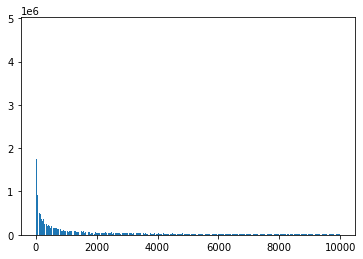

In [35]:
plt.bar('id', 'ratings_count', data=books.sort_values('ratings_count', ascending=False))

In [32]:
books = pd.read_csv('data/books.csv')

In [33]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [34]:
books = books[['id', 'book_id', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'title', 'language_code']]
books.head()

,id,book_id,isbn,isbn13,authors,original_publication_year,title,language_code
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng
1,2,3,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US
3,4,2657,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng


In [35]:
books.language_code.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [36]:
books = books.replace(['eng', 'en-US', 'en-GB', 'en', 'en-CA'], 'eng')

In [37]:
books.fillna('unknown').groupby('language_code').aggregate({'id':'count'}).sort_values('id', ascending=False).transpose()

language_code,eng,unknown,ara,fre,ind,spa,ger,per,jpn,por,...,dan,ita,fil,nl,mul,rum,rus,swe,tur,vie
id,8730,1084,64,25,21,20,13,7,7,6,...,3,2,2,1,1,1,1,1,1,1


In [40]:
pd.merge(ratings, books[['id', 'language_code']], left_on='book_id', right_on='id', how='left').fillna('unknown') \
.groupby('language_code').aggregate({'rating':'count'}).sort_values('rating', ascending=False).transpose()

language_code,eng,unknown,spa,fre,ara,ger,ind,jpn,por,nl,...,per,dan,ita,mul,vie,swe,fil,rus,tur,rum
rating,5579146,337020,25033,10815,10543,3837,2649,1190,1043,1017,...,700,479,307,195,179,129,75,67,67,64


In [41]:
books

,id,book_id,isbn,isbn13,authors,original_publication_year,title,language_code
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng
1,2,3,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng
3,4,2657,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng
...,...,...,...,...,...,...,...,...
9995,9996,7130616,441019455,9.780441e+12,Ilona Andrews,2010.0,"Bayou Moon (The Edge, #2)",eng
9996,9997,208324,067973371X,9.780680e+12,Robert A. Caro,1990.0,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng
9997,9998,77431,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,eng
9998,9999,8565083,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,eng


In [107]:
books.loc[(books.language_code.isna() & ~books.title.isna())].head()

,id,isbn,isbn13,authors,original_publication_year,title,language_code
44,45,770430074,9.780770e+12,Yann Martel,2001.0,Life of Pi,NaN
131,132,1401308589,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,NaN
203,204,1561797464,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,NaN
236,237,1416524304,9.781417e+12,Stephen King,1974.0,Carrie,NaN
287,288,425172902,9.780425e+12,Tom Clancy,1984.0,"The Hunt for Red October (Jack Ryan Universe, #4)",NaN


do we use only english or that monstrous dataset?

In [78]:
books.loc[(books.original_publication_year.isna() | books.authors.isna() | books.title.isna())].shape[0]

21

delete missing year, title

In [111]:
books = books.loc[(~books.original_publication_year.isna() & ~books.authors.isna() & ~books.title.isna())]
books['original_publication_year'] = books['original_publication_year'].astype(int)

In [42]:
books

,id,book_id,isbn,isbn13,authors,original_publication_year,title,language_code
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng
1,2,3,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng
3,4,2657,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng
...,...,...,...,...,...,...,...,...
9995,9996,7130616,441019455,9.780441e+12,Ilona Andrews,2010.0,"Bayou Moon (The Edge, #2)",eng
9996,9997,208324,067973371X,9.780680e+12,Robert A. Caro,1990.0,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng
9997,9998,77431,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,eng
9998,9999,8565083,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,eng


In [184]:
# books_xml = pd.DataFrame()
with open('data/books_xml/250.xml') as f:
    b = f.read()
        
from bs4 import BeautifulSoup
soup = BeautifulSoup(b, 'html.parser')

import re
def removetags(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, ' ', raw_html)
    return cleantext

#removetags(soup.find('description').contents[0])
#[i.find('title').contents[1] for i in soup.find_all('series')]
soup.find('title_without_series').contents[0]
#title_without_series

'A Literate Passion: Letters of AnaГЇs Nin  Henry Miller, 1932-1953'

In [197]:
import os
from bs4 import BeautifulSoup
import re
def removetags(raw_html):
        cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        cleantext = re.sub(cleanr, ' ', raw_html)
        return cleantext

#books['description'] = np.nan

book_enhance = pd.DataFrame(columns=['book_id', 'authors_id', 'series', 'title_without_series'])

for file in os.listdir('data/books_xml'):
    with open('data/books_xml/' + file, encoding='utf-8') as f:
        b = f.read()
    
    soup = BeautifulSoup(b, 'html.parser')
    
    book_id = int(soup.find('id').contents[0])
    #print(book_id)
    authors = [i.find('id').contents[0] for i in soup.find('authors').find_all('author')]
    series = [i.find('title').contents[1].strip('\n').strip(' ') for i in soup.find_all('series')]
    try: title_without_series = soup.find('title_without_series').contents[0]
    except: title_without_series = ''
    try: description = removetags(soup.find('description').contents[0])
    except: description = ''
    
    book_enhance = book_enhance.append({
        'book_id':book_id, 'authors_id':authors, 'series':series, 'title_without_series':title_without_series
    }, ignore_index=True)

In [198]:
book_enhance

,book_id,authors_id,series,title_without_series
0,1,"[1077326, 2927]","[\n Harry Potter\n, \n Harry Potter Pers...",Squire
1,10,[1077326],[\n Harry Potter\n],The Twilight Collection
2,10006,[296961],[],"Nervous System: Or, Losing My Mind in Literature"
3,1000751,[10673],[\n Pollyanna\n],Rebecca of Sunnybrook Farm
4,10008056,[1734716],[\n Afdeling Q\n],Lärjungen
...,...,...,...,...
9995,9995135,[48192],[\n Lords of the Underworld\n],Lethal Rider
9996,99955,"[57639, 1009882, 695235]",[],When You Ride Alone You Ride With Bin Laden: W...
9997,9998,"[6526, 1078285]",[],Some Prefer Nettles
9998,9998705,[26372],[\n Temperance Brennan\n],Silent Mercy


In [209]:
book_enhance['series_len'] = [len(l) for l in book_enhance.series]

In [214]:
book_enhance.loc[book_enhance['series_len']==4]

,book_id,authors_id,series,title_without_series,series_len
84,102459,[10182],"[\n Hellboy\n, \n Hellboy: Edición rústi...","The Goon, Volume 3: Heaps of Ruination",4
233,105973,"[12424, 61314, 8503442, 55804, 89366, 286007, ...","[\n House Of M\n, \n Decimation\n, \n ...",X-Men: Messiah CompleX,4
244,106069,"[32594, 61388, 399434, 93215]","[\n Batman\n, \n Loeb and Sale's Batman\...",Gotham Central Book Three: On the Freak Beat,4
246,106076,"[32594, 61388]","[\n Loeb and Sale's Batman\n, \n Batman\...",Robin: Year One,4
286,107017,"[32594, 15090, 5763607]","[\n DC Comics Graphic Novel Collection\n, \...",Batman: Private Casebook,4
...,...,...,...,...,...
9163,84151,[4430],"[\n Dark-Hunterverse\n, \n Dark-Hunters\...",Midnight Pleasures,4
9180,8447255,[31232],"[\n Malazan Book of the Fallen\n, \n Mal...",Orb Sceptre Throne,4
9591,92846,[9629],"[\n Voyage of the Jerle Shannara\n, \n S...",The Chaos Balance,4
9593,92855,[9629],"[\n The Original Shannara Trilogy\n, \n ...",The Hidden City,4


In [232]:
book_enhance['series_first'] = [l[0] if len(l)>0 else '' for l in book_enhance.series]
book_enhance

,book_id,authors_id,series,title_without_series,series_len,series_first
0,1,"[1077326, 2927]","[\n Harry Potter\n, \n Harry Potter Pers...",Squire,2,Harry Potter
1,10,[1077326],[\n Harry Potter\n],The Twilight Collection,1,Harry Potter
2,10006,[296961],[],"Nervous System: Or, Losing My Mind in Literature",0,
3,1000751,[10673],[\n Pollyanna\n],Rebecca of Sunnybrook Farm,1,Pollyanna
4,10008056,[1734716],[\n Afdeling Q\n],Lärjungen,1,Afdeling Q
...,...,...,...,...,...,...
9995,9995135,[48192],[\n Lords of the Underworld\n],Lethal Rider,1,Lords of the Underworld
9996,99955,"[57639, 1009882, 695235]",[],When You Ride Alone You Ride With Bin Laden: W...,0,
9997,9998,"[6526, 1078285]",[],Some Prefer Nettles,0,
9998,9998705,[26372],[\n Temperance Brennan\n],Silent Mercy,1,Temperance Brennan
